In [1]:
from TotalCalculation import *
from preprocessing import *
import os
from datetime import datetime as dt

In [2]:
filename = image.getFilename(path=r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-02')
print(filename)

['C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528580358511740.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528583058730870.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528585759997528.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528588461334155.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528591261206001.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528593961442193.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528596661886075.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_c

In [3]:
filetime = []
extract_name = lambda x : int(os.path.splitext(os.path.basename(x))[0])
filetime = [extract_name(i) for i in filename]
decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=7)) for t in filetime]
print(decimal)

[0.009722222222222222, 0.08472222222222221, 0.1597222222222222, 0.23500000000000001, 0.31277777777777777, 0.3877777777777778, 0.4627777777777778, 0.5377777777777778, 0.6127777777777778, 0.6877777777777778, 0.7627777777777778, 0.8377777777777778, 0.9127777777777778, 0.9905555555555555, 1.0655555555555556, 1.1405555555555555, 1.2155555555555555, 1.2905555555555555, 1.3655555555555556, 1.4405555555555556, 1.5155555555555555, 1.5908333333333335, 1.668611111111111, 1.7436111111111112, 1.8186111111111112, 1.8936111111111111, 1.9686111111111113, 2.043611111111111, 2.118611111111111, 2.1936111111111107, 2.268611111111111, 2.343611111111111, 2.4213888888888886, 2.4963888888888888, 2.5713888888888885, 2.6463888888888887, 2.721388888888889, 2.7963888888888886, 2.8716666666666666, 2.9466666666666668, 3.0216666666666665, 3.0994444444444444, 3.174444444444444, 3.2494444444444444, 3.324444444444444, 3.3994444444444443, 3.4744444444444444, 3.549444444444444, 3.6244444444444444, 3.6994444444444445, 3.7

In [4]:
decimal = []
for i in filetime:    
    t = timeConvertion().ticks_to_datetime(ticks=i,time_zone=7)
    decimal.append(timeConvertion().datetime_to_decimal(time=t))

In [5]:
start_date = str(dt(t.year,1,1).date())
sunrise,sunset = SunPosition().SunriseSunset(filename=filetime,start_date=start_date,include_end_date=True)
print(sunrise,sunset)

5.832307461121208 18.90558728227744


In [6]:
filtering = lambda x : (x > sunrise) & (x < sunset)
day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [10]:
Day_filename = [filename[i] for i in day_indices]
night_filename = [filename[i] for i in night_indices]

In [9]:
Day_filename,night_filename = image.extract_filename(filename=filename,sunrise=sunrise,sunset=sunset)

In [11]:
print(Day_filename)

['C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528791304305991.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528792904526564.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528794305339293.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528795506089664.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528796707112191.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528797907910802.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-02\\638528799708622708.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_c

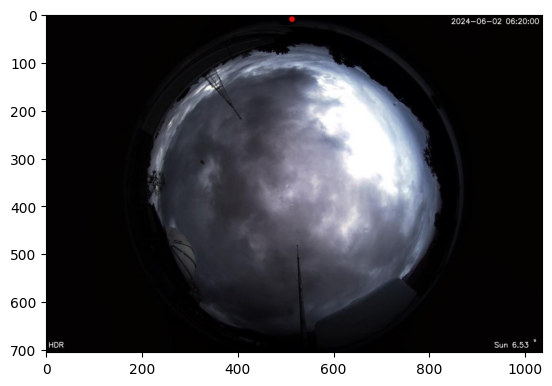

In [23]:
import cv2
from matplotlib import pyplot as plt
im = 12
images = []
images = [cv2.imread(i) for i in Day_filename]
images = [cv2.cvtColor(i,cv2.COLOR_BGR2RGB) for i in images]
plt.imshow(images[im])

In [ ]:

masked,value,channel = thresholding().RBratio()